<a href="https://colab.research.google.com/github/GabrielCaspirro/Python/blob/main/2_ExemploAnalisedasInscricoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Simples - Inscrições do Curso

### Após a Aula introdutória vamos ver como colher algumas informações Simples Usando Python

In [ ]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados

### Veja neste link como armazenar uma planilha excel no Github para usar como base de dados no COLAB

In [ ]:
url = 'https://github.com/profcintiapinho/laboratorio_ia/blob/main/respostasalunos.xlsx?raw=true' #pega o caminho do arquivo excel no github
planilha = "respostas" #identifica a planilha que está os dados
base = pd.read_excel(url,planilha) #pega o caminho e a planilha exata e armazena na variável

In [ ]:
base

,Turma,interesse,computador,motivacao
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q..."
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos
...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática


In [ ]:
import matplotlib.pyplot as plt #biblioteca para gerar gráficos
import seaborn as sns #biblioteca para visualizar gráficos

Text(0.5, 1.0, 'Curso dos Alunos')

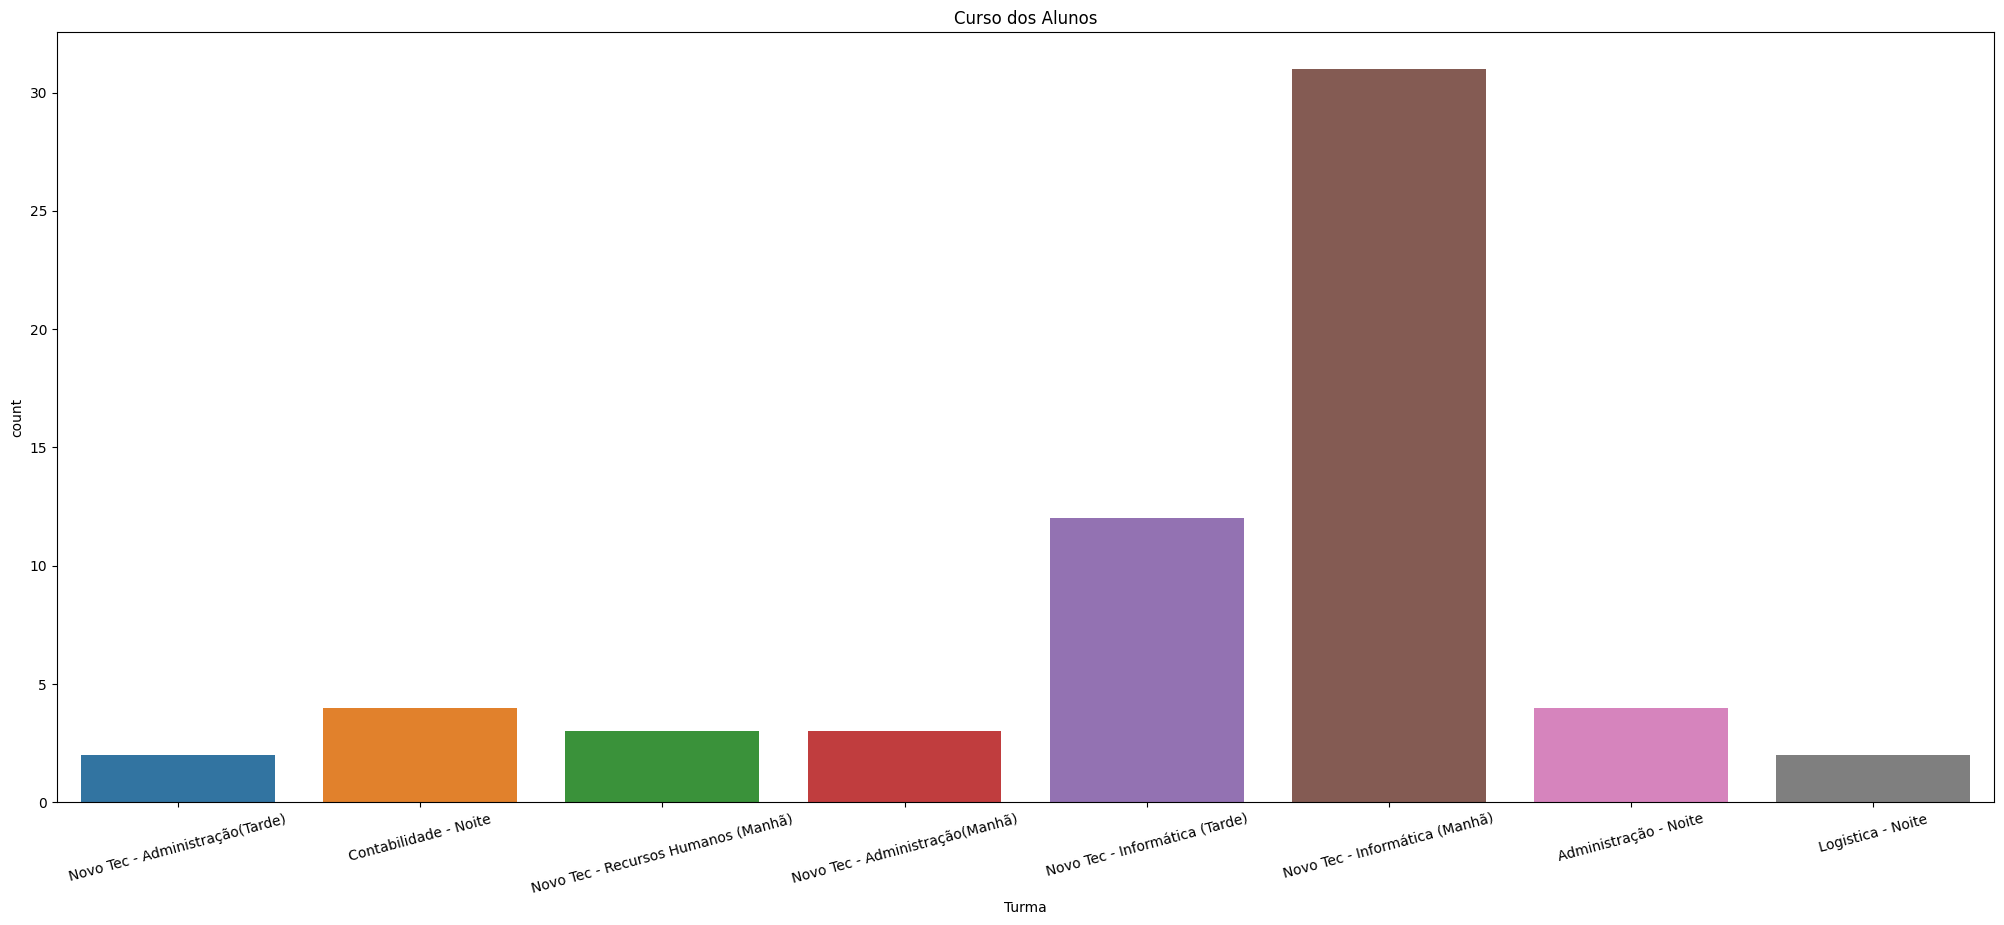

In [ ]:
plt.subplots(figsize=(25, 10))
plt.xticks(rotation=15)
sns.countplot(x=base["Turma"]);
plt.title('Curso dos Alunos')

Text(0.5, 1.0, 'Alunos possuem computadores?')

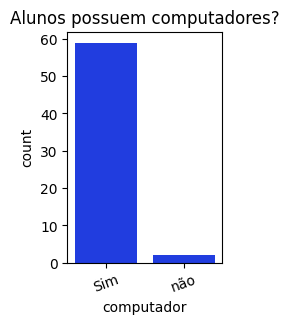

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(2,3))
plt.xticks(rotation=20)
sns.countplot(x=base['computador'], color='#0127FF');
plt.title('Alunos possuem computadores?')

In [ ]:

base['interesse'].value_counts()

Tarde    31
Noite    30
Name: interesse, dtype: int64

In [ ]:
tarde = base['interesse'].value_counts()['Tarde']
noite = base['interesse'].value_counts()['Noite']

In [ ]:
x = ["Tarde", "Noite"]
y = [tarde, noite]

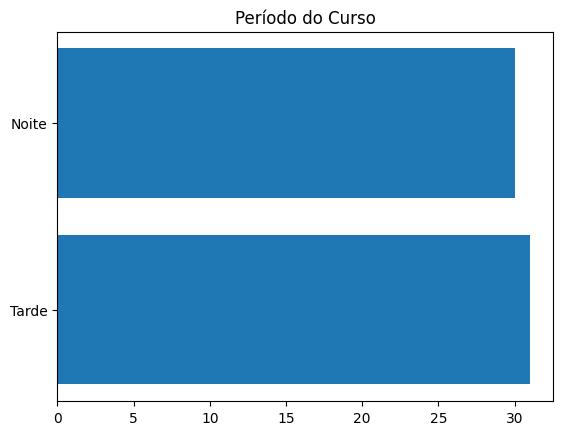

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=0)
plt.title('Período do Curso')
plt.show()

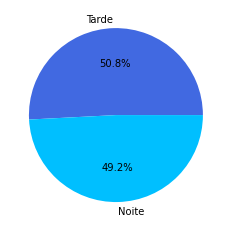

In [ ]:
cores = ['#4169E1','#00BFFF','#00008B']
plt.pie(y, labels=x, autopct='%1.1f%%', colors = cores)
plt.show()

In [ ]:
import spacy
import re

In [ ]:
!python -m spacy download pt_core_news_sm

2023-09-01 10:55:58.871578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 15.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
pln = spacy.load('pt_core_news_sm')

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = pln(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()])


    #return result # 5
    return texto # 5

In [ ]:
base.motivacao=base.motivacao.astype(str)
base['limpa'] = base['motivacao'].apply(preprocessamento)

In [ ]:
base

,Turma,interesse,computador,motivacao,limpa
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...,liga aprender tecnologia
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...,conseguir automatizar processos trabalho
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q...",obter conhecimento solicitado mercado trabalho
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...,python linguagens programação fácil executar p...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos,aprimorar
...,...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...,busca conhecimentos agregar vida
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática,ampliar conhecimentos informática


In [ ]:
motivo = base['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

In [ ]:
textooo = """O título desse texto na verdade não é meu, e sim de um poema do uruguaio Mario Benedetti. No original, chama-se "Alegría de la tristeza" e está no livro "La vida ese paréntesis" que, até onde sei, permanece inédito no Brasil.

O poema diz que a gente pode entristecer-se por vários motivos ou por nenhum motivo aparente, a tristeza pode ser por nós mesmos ou pelas dores do mundo, pode advir de uma palavra ou de um gesto, mas que ela sempre aparece e devemos nos aprontar para recebê-la, porque existe uma alegria inesperada na tristeza, que vem do fato de ainda conseguirmos senti-la.

Pode parecer confuso mas é um alento. Olhe para o lado: estamos vivendo numa era em que pessoas matam em briga de trânsito, matam por um boné, matam para se divertir. Além disso, as pessoas estão sem dinheiro. Quem tem emprego, segura. Quem não tem, procura. Os que possuem um amor desconfiam até da própria sombra, já que há muita oferta de sexo no mercado. E a gente corre pra caramba, é escravo do relógio, não consegue mais ficar deitado numa rede, lendo um livro, ouvindo música. Há tanta coisa pra fazer que resta pouco tempo pra sentir.

Por isso, qualquer sentimento é bem-vindo, mesmo que não seja uma euforia, um gozo, um entusiasmo, mesmo que seja uma melancolia. Sentir é um verbo que se conjuga para dentro, ao contrário do fazer, que é conjugado pra fora.

Sentir alimenta, sentir ensina, sentir aquieta. Fazer é muito barulhento.

Sentir é um retiro, fazer é uma festa. O sentir não pode ser escutado, apenas auscultado. Sentir e fazer, ambos são necessários, mas só o fazer rende grana, contatos, diplomas, convites, aquisições. Até parece que sentir não serve para subir na vida.

Uma pessoa triste é evitada. Não cabe no mundo da propaganda dos cremes dentais, dos pagodes, dos carnavais. Tristeza parece praga, lepra, doença contagiosa, um estacionamento proibido. Ok, tristeza não faz realmente bem pra saúde, mas a introspecção é um recuo providencial, pois é quando silenciamos que melhor conversamos com nossos botões. E dessa conversa sai luz, lições, sinais, e a tristeza acaba saindo também, dando espaço para uma alegria nova e revitalizada. Triste é não sentir nada."""

In [ ]:
textooo = preprocessamento(textooo)

In [ ]:
juntandotudo

'liga aprender tecnologia conseguir automatizar processos trabalho obter conhecimento solicitado mercado trabalho python linguagens programação fácil executar projetos tamanhos sabendo python aprimorar conhecimentos aprimorar conhecimentos venho interessando tecnologia conhecimento adquirir conhecimentos agregar conhecimentos currículo achei interessante curso melhorar conhecimento python interessei gosto programação estudei python conhecimento indicação documentário coded bias desenvolvi interesse expandir conhecimentos futuro melhor incrementar currículo interesse interesse explorar áreas informática estudei python motivos conhecer mexe funciona adquirir conhecimento busco melhor capacitação ingressar mercado trabalho interesse tema curso gosto aprender coisas acredito oportunidade aparece agarrada tema curso desperta interesse experiência area interesse aprender tecnologias atuais ampliar conhecimento amo áreae decidindo aprender fundamental aprender coisas tornar profissional quali

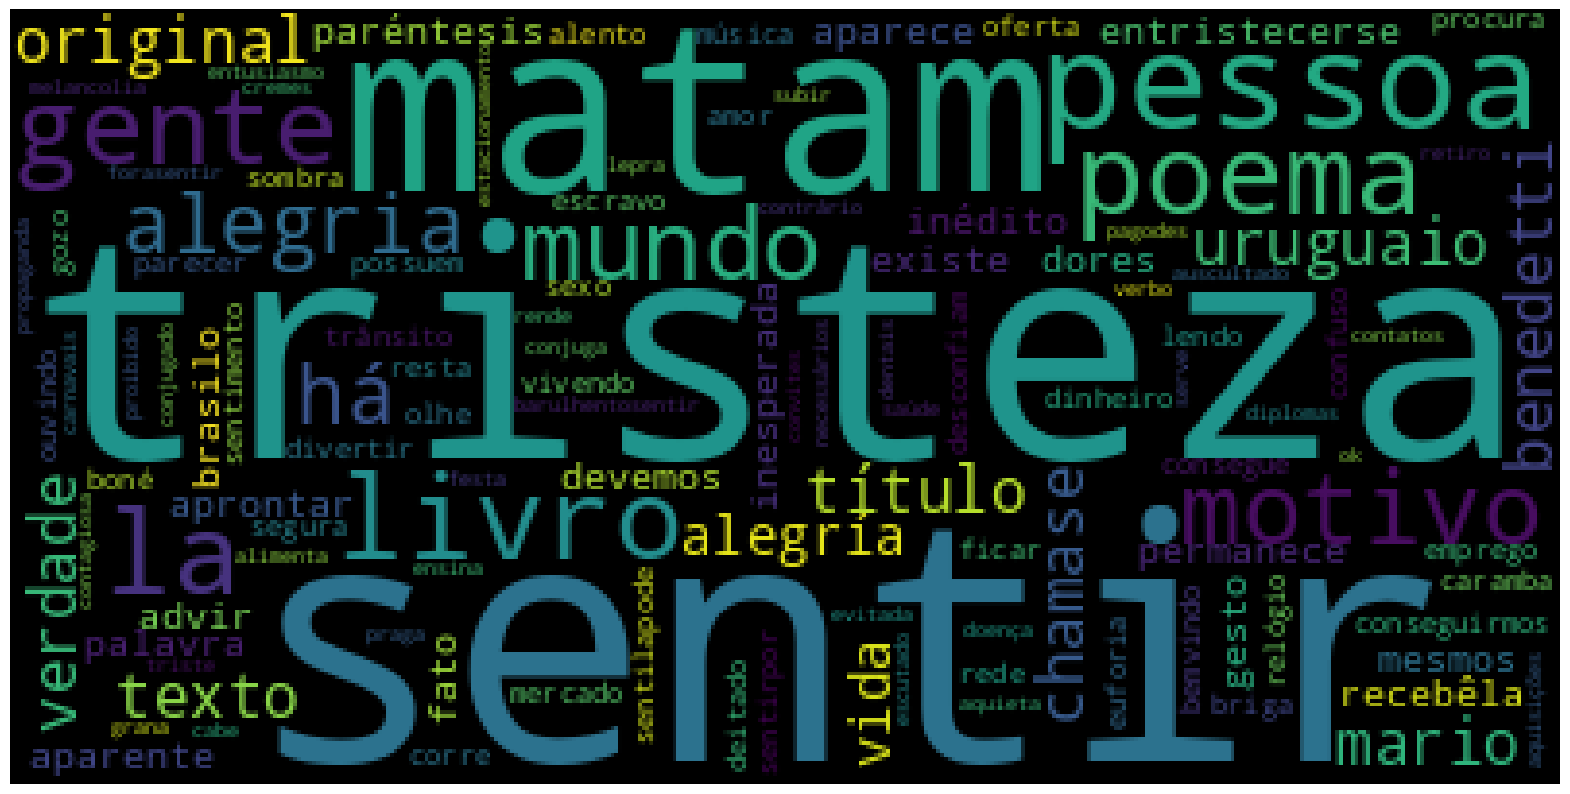

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(textooo))